In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Exploratory Data Analysis


In [7]:
# use filtered data with no outliers
df = pd.read_csv('2017_filtered.csv', index_col=False)
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,1.043100e+09,1.976520e+08,0.112000,0.1814,1.3210,3.790190e+08,0.0104,0.0,-11.859928,0,Consumer Defensive
1,1.275000e+09,3.150000e+08,0.152157,0.0656,9.9810,1.940000e+08,0.0000,0.0,22.699392,1,Consumer Defensive
2,2.348860e+09,2.915966e+08,0.084000,0.0737,12.2137,2.326531e+08,0.0000,0.0,-0.238669,0,Consumer Defensive
3,8.820600e+08,2.301880e+08,0.079000,0.0844,15.5270,1.486720e+08,0.0000,0.0,-29.642288,0,Consumer Defensive
4,1.327029e+09,1.546420e+08,-0.078000,-0.1298,6.4680,1.351300e+08,0.0000,0.0,-5.240649,0,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1936,1.438980e+08,1.411800e+07,0.031000,0.1042,6.2050,7.544000e+06,0.0000,0.0,34.893617,1,Technology
1937,6.257258e+07,5.511650e+05,0.004000,0.0347,3.9440,7.503710e+05,0.0000,0.0,-12.264152,0,Technology
1938,1.065240e+08,8.731000e+06,0.033000,0.2699,1.0150,2.076000e+06,0.0000,9224000.0,46.716421,1,Technology
1939,1.040000e+08,5.000000e+06,-0.019231,0.0656,9.9810,-7.000000e+06,0.0000,0.0,-32.220041,0,Technology


## 2.1 Group by Sector

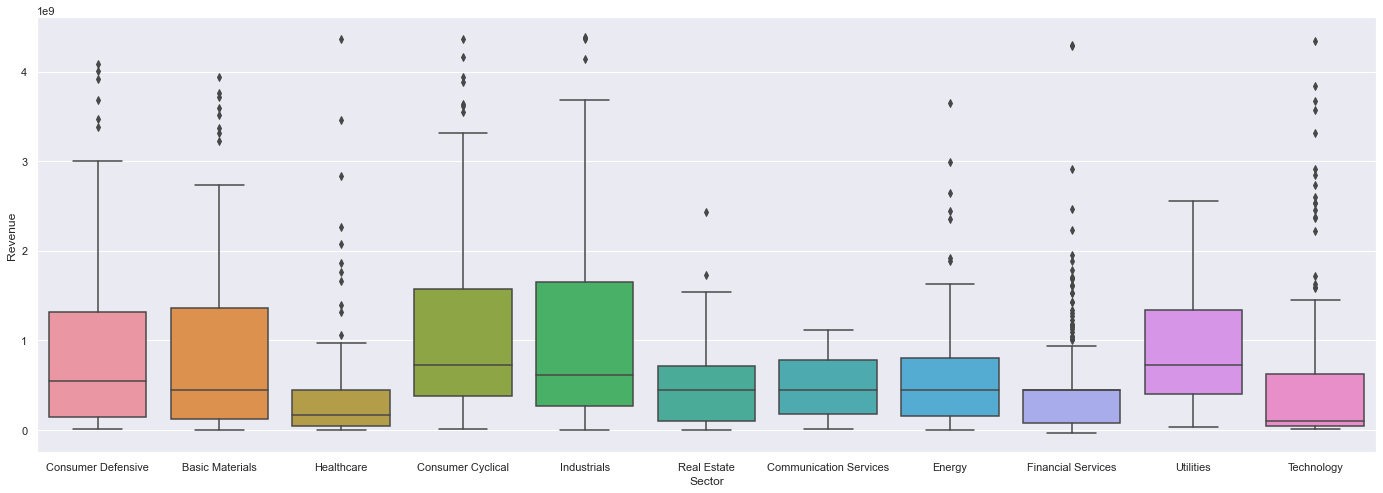

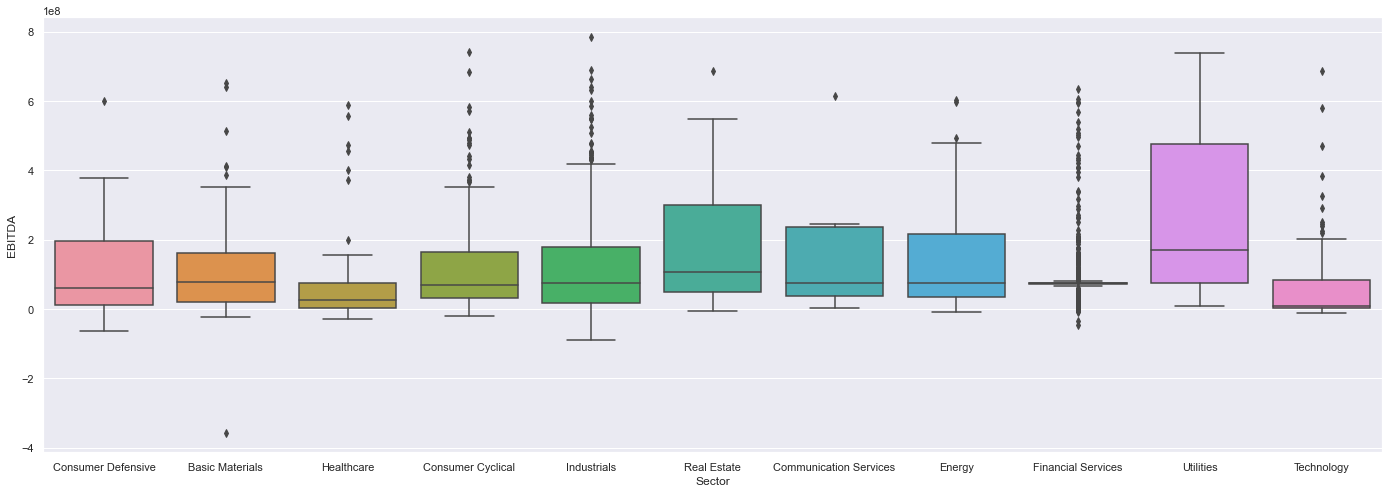

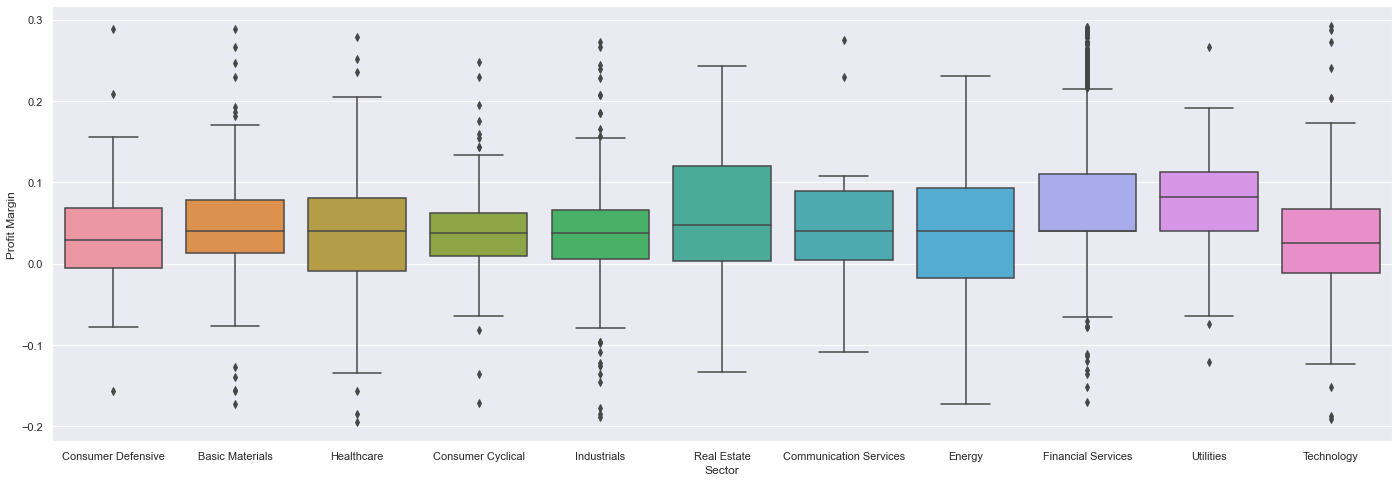

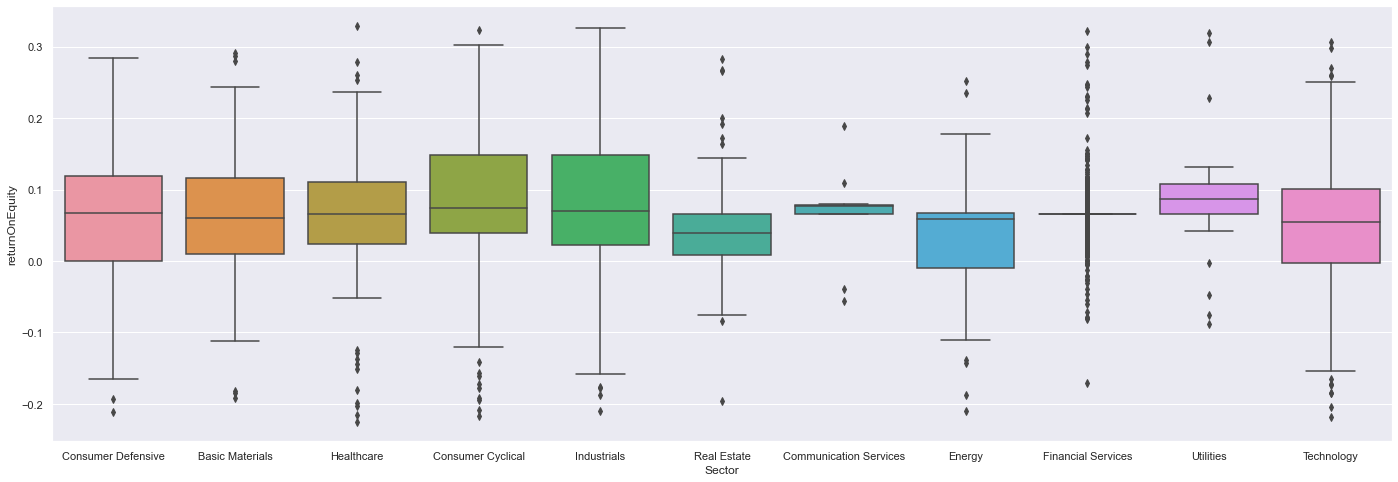

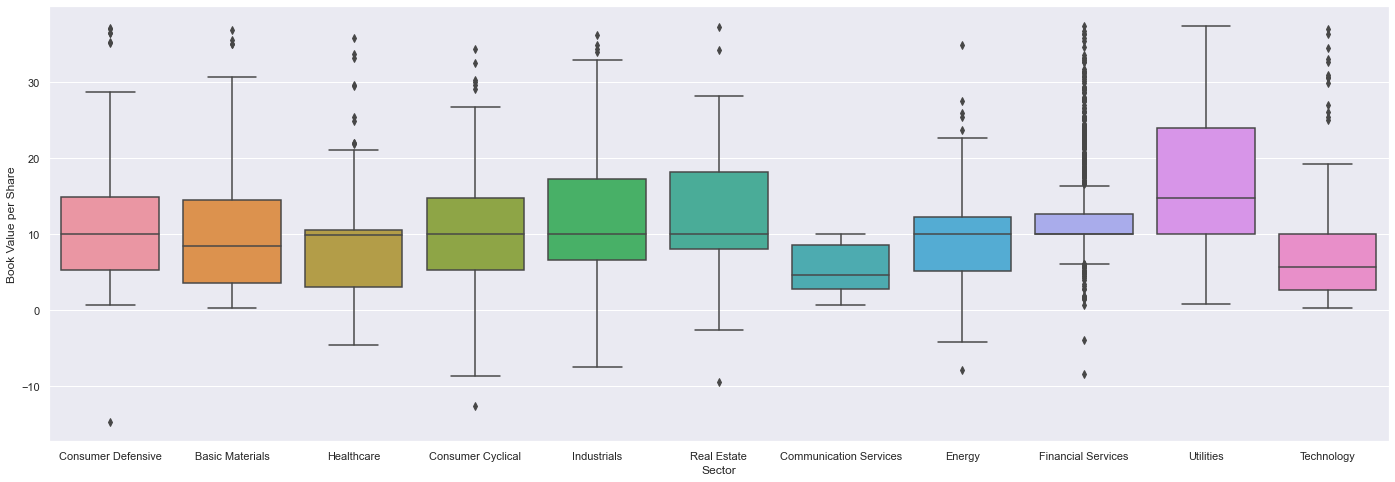

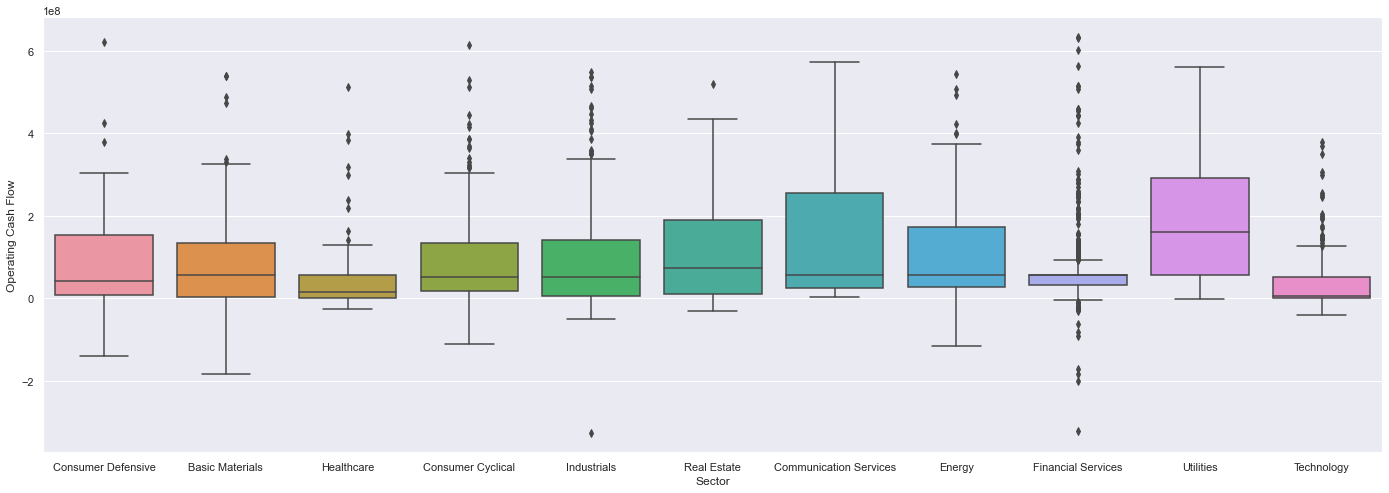

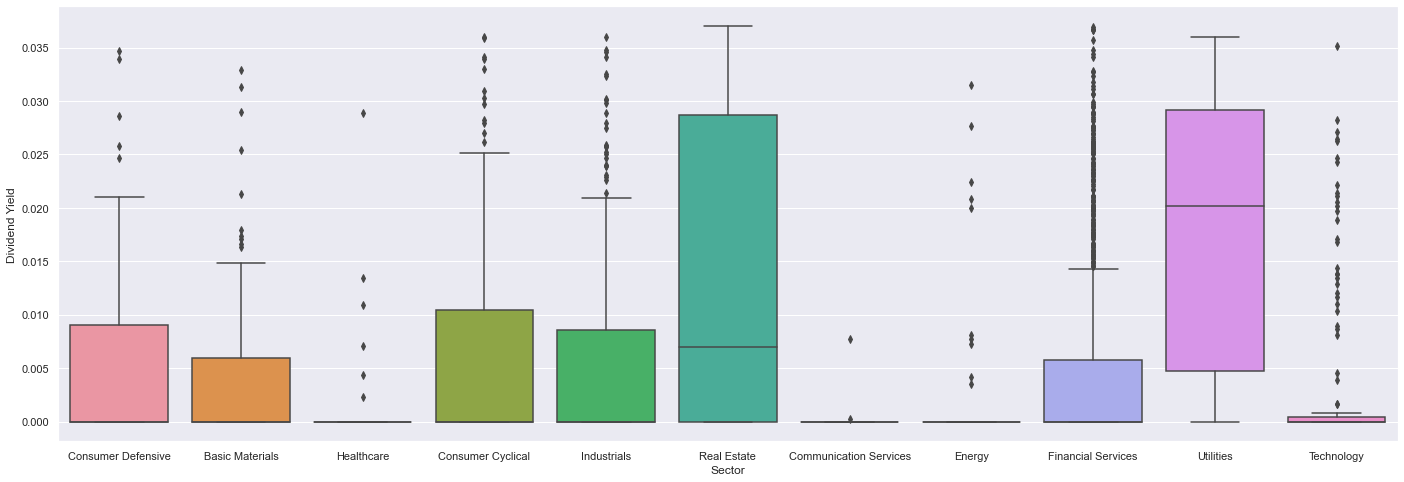

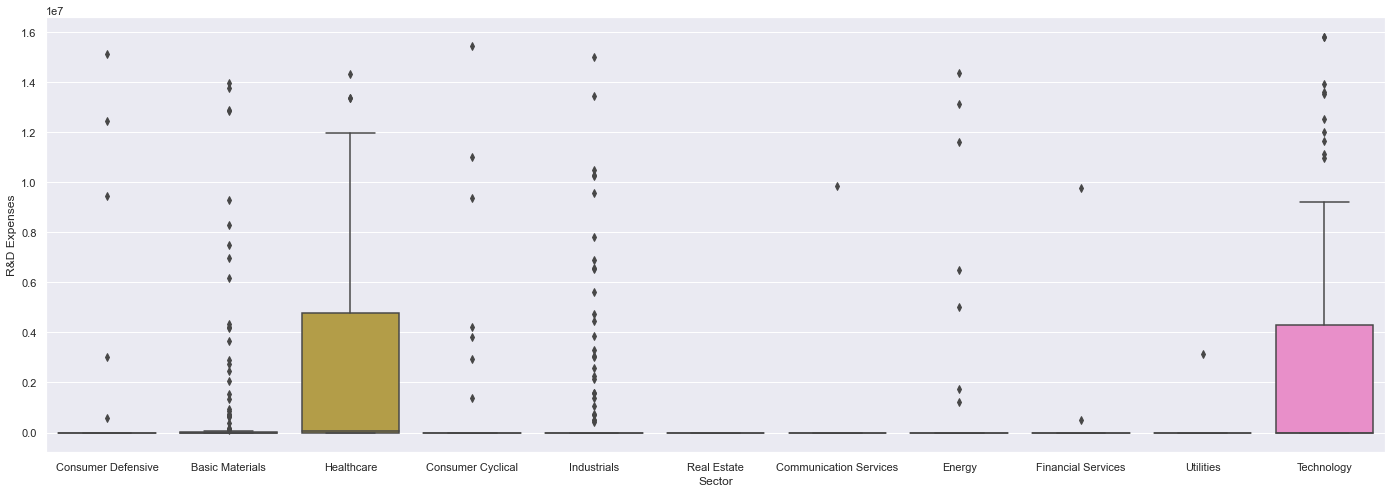

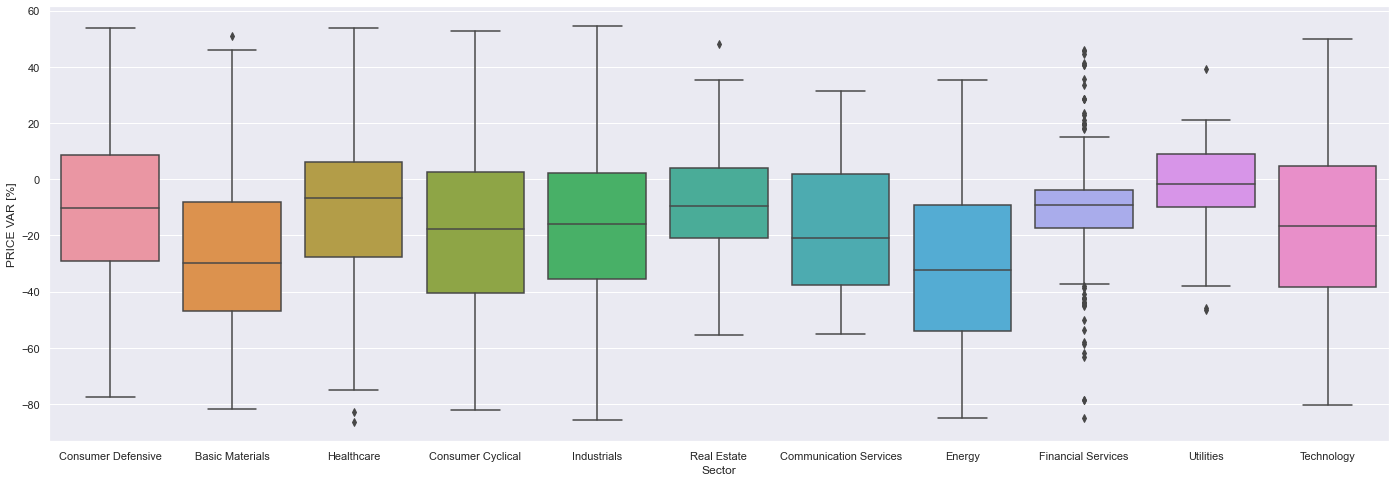

In [8]:
for factor in df.columns[0:-2]:
    f, axes = plt.subplots(1, 1, figsize=(24,8))
    sns.boxplot(x = 'Sector', y = factor, data = df, ax = axes)

In [9]:
# find percentage of stock that has 'buy' rating (Class = 1, PRICE VAR [%] > 0) in each Sector
for sector in df['Sector'].unique():
    buy_count = len(df.loc[(df['Class'] == 1) & (df['Sector'] == sector)])
    total_size = len(df.loc[df['Sector'] == sector])
    print(f'{sector} {round(100 * buy_count / total_size, 2)}%')

Consumer Defensive 31.65%
Basic Materials 18.64%
Healthcare 40.51%
Consumer Cyclical 26.78%
Industrials 31.1%
Real Estate 32.79%
Communication Services 27.27%
Energy 19.7%
Financial Services 15.49%
Utilities 44.44%
Technology 30.53%


## 2.2 Correlation Matrix

<AxesSubplot:>

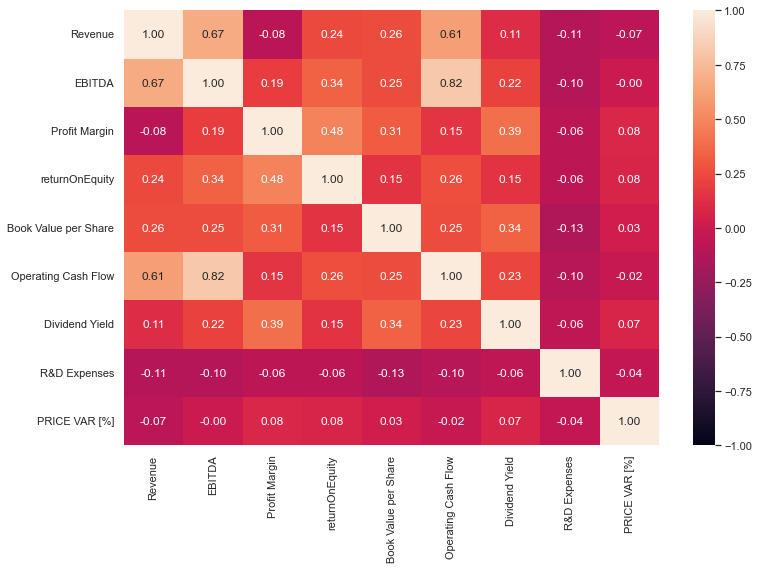

In [10]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

There is no strong correlation between one specific indicator with PRICE VAR [%].
So we will use ML models to only predict Buy/Sell (Class = 1/0) from these indicators.